Epoch 0, Loss: 0.3972793412409712
Epoch 100, Loss: 0.020334501347522835
Epoch 200, Loss: 0.00851802662810535
Epoch 300, Loss: 0.005231655365057902
Epoch 400, Loss: 0.003734483675866044
Epoch 500, Loss: 0.002887846841727493
Epoch 600, Loss: 0.0023466535638120172
Epoch 700, Loss: 0.0019722079051239147
Epoch 800, Loss: 0.0016983755575988087
Epoch 900, Loss: 0.001489751225277359


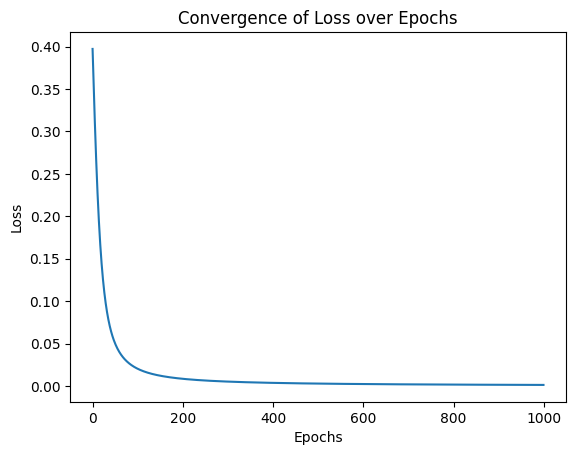

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Input patterns for digits 0-9 (7-segment encoding)
seven_segment_data = {
    0: [1, 1, 1, 1, 1, 1, 0],
    1: [0, 1, 1, 0, 0, 0, 0],
    2: [1, 1, 0, 1, 1, 0, 1],
    3: [1, 1, 1, 1, 0, 0, 1],
    4: [0, 1, 1, 0, 0, 1, 1],
    5: [1, 0, 1, 1, 0, 1, 1],
    6: [0, 0, 1, 1, 1, 1, 1],
    7: [1, 1, 1, 0, 0, 0, 0],
    8: [1, 1, 1, 1, 1, 1, 1],
    9: [1, 1, 1, 0, 0, 1, 1]
}

# Convert data to arrays
inputs = np.array(list(seven_segment_data.values()))
labels = np.ones((10, 1))  # Output 1 for all digits 0-9 as target labels

# Network architecture parameters
input_size = 7
hidden_layer1_size = 10  # Adjustable parameter
hidden_layer2_size = 10  # Adjustable parameter
output_size = 1

# Initialize weights and biases
np.random.seed(42)
weights1 = np.random.randn(input_size, hidden_layer1_size)
bias1 = np.random.randn(hidden_layer1_size)
weights2 = np.random.randn(hidden_layer1_size, hidden_layer2_size)
bias2 = np.random.randn(hidden_layer2_size)
weights3 = np.random.randn(hidden_layer2_size, output_size)
bias3 = np.random.randn(output_size)

# Activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Feedforward function
def feedforward(inputs):
    global hidden_layer1_output, hidden_layer2_output, output

    hidden_layer1_output = sigmoid(np.dot(inputs, weights1) + bias1)
    hidden_layer2_output = sigmoid(np.dot(hidden_layer1_output, weights2) + bias2)
    output = sigmoid(np.dot(hidden_layer2_output, weights3) + bias3)
    return output

# Backpropagation function
def backpropagation(inputs, labels):
    global weights1, bias1, weights2, bias2, weights3, bias3

    # Forward pass
    feedforward(inputs)

    # Output layer error and delta
    output_error = labels - output
    output_delta = output_error * sigmoid_derivative(output)

    # Hidden layer 2 error and delta
    hidden_layer2_error = np.dot(output_delta, weights3.T)
    hidden_layer2_delta = hidden_layer2_error * sigmoid_derivative(hidden_layer2_output)

    # Hidden layer 1 error and delta
    hidden_layer1_error = np.dot(hidden_layer2_delta, weights2.T)
    hidden_layer1_delta = hidden_layer1_error * sigmoid_derivative(hidden_layer1_output)

    # Update weights and biases
    weights3 += learning_rate * np.dot(hidden_layer2_output.T, output_delta)
    bias3 += learning_rate * np.sum(output_delta, axis=0)
    weights2 += learning_rate * np.dot(hidden_layer1_output.T, hidden_layer2_delta)
    bias2 += learning_rate * np.sum(hidden_layer2_delta, axis=0)
    weights1 += learning_rate * np.dot(inputs.T, hidden_layer1_delta)
    bias1 += learning_rate * np.sum(hidden_layer1_delta, axis=0)

    return np.mean(output_error ** 2)

# Training parameters
epochs = 1000
learning_rate = 0.01
loss_history = []

# Training loop
for epoch in range(epochs):
    epoch_loss = backpropagation(inputs, labels)
    loss_history.append(epoch_loss)

    # Print progress every 100 epochs
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {epoch_loss}')

# Plot the loss history
plt.plot(loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Convergence of Loss over Epochs')
plt.show()

# Evaluation with N-fold cross-validation
def evaluate_model(X, y, folds=5):
    kfold = KFold(n_splits=folds, shuffle=True, random_state=42)
    accuracy, precision, recall, f_measure = [], [], [], []

    for train_index, test_index in kfold.split(X):
        # Split data into train and test sets
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Train the model
        for epoch in range(epochs):
            backpropagation(X_train, y_train)
        
        # Test the model
        predictions = np.round(feedforward(X_test))
        
        # Calculate metrics
        accuracy.append(accuracy_score(y_test, predictions))
        precision.append(precision_score(y_test, predictions))
        recall.append(recall_score(y_test, predictions))
        f_measure.append(f1_score(y_test, predictions))
    
    # Print average metrics
    print(f'Accuracy: {np.mean(accuracy)}')
    print(f'Precision: {np.mean(precision)}')
    print(f'Recall: {np.mean(recall)}')
    print(f'F1-Score: {np.mean(f_measure)}')

# Perform N-fold cross-validation
evaluate_model(inputs, labels)


Epoch 0, Loss: 0.3972793412409712
Epoch 100, Loss: 0.020334501347522835
Epoch 200, Loss: 0.00851802662810535
Epoch 300, Loss: 0.005231655365057902
Epoch 400, Loss: 0.003734483675866044
Epoch 500, Loss: 0.002887846841727493
Epoch 600, Loss: 0.0023466535638120172
Epoch 700, Loss: 0.0019722079051239147
Epoch 800, Loss: 0.0016983755575988087
Epoch 900, Loss: 0.001489751225277359


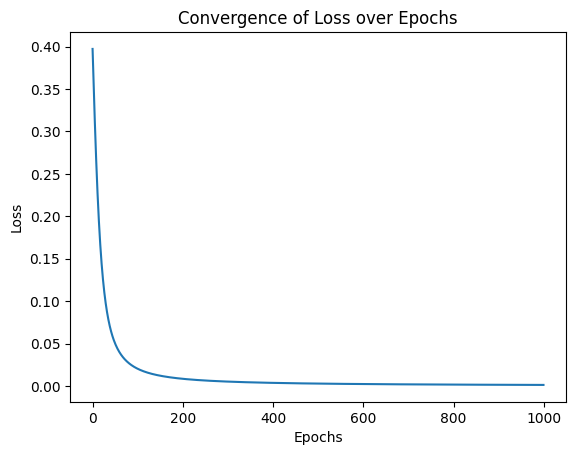

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0

Predicted and Actual Outputs:
Digit 0: Predicted=1, Actual=1
Digit 1: Predicted=1, Actual=1
Digit 2: Predicted=1, Actual=1
Digit 3: Predicted=1, Actual=1
Digit 4: Predicted=1, Actual=1
Digit 5: Predicted=1, Actual=1
Digit 6: Predicted=1, Actual=1
Digit 7: Predicted=1, Actual=1
Digit 8: Predicted=1, Actual=1
Digit 9: Predicted=1, Actual=1


In [5]:
# Complete code (with added section to display predictions)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Input patterns for digits 0-9 (7-segment encoding)
seven_segment_data = {
    0: [1, 1, 1, 1, 1, 1, 0],
    1: [0, 1, 1, 0, 0, 0, 0],
    2: [1, 1, 0, 1, 1, 0, 1],
    3: [1, 1, 1, 1, 0, 0, 1],
    4: [0, 1, 1, 0, 0, 1, 1],
    5: [1, 0, 1, 1, 0, 1, 1],
    6: [0, 0, 1, 1, 1, 1, 1],
    7: [1, 1, 1, 0, 0, 0, 0],
    8: [1, 1, 1, 1, 1, 1, 1],
    9: [1, 1, 1, 0, 0, 1, 1]
}

# Convert data to arrays
inputs = np.array(list(seven_segment_data.values()))
labels = np.ones((10, 1))  # Output 1 for all digits 0-9 as target labels

# Network architecture parameters
input_size = 7
hidden_layer1_size = 10  # Adjustable parameter
hidden_layer2_size = 10  # Adjustable parameter
output_size = 1

# Initialize weights and biases
np.random.seed(42)
weights1 = np.random.randn(input_size, hidden_layer1_size)
bias1 = np.random.randn(hidden_layer1_size)
weights2 = np.random.randn(hidden_layer1_size, hidden_layer2_size)
bias2 = np.random.randn(hidden_layer2_size)
weights3 = np.random.randn(hidden_layer2_size, output_size)
bias3 = np.random.randn(output_size)

# Activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Feedforward function
def feedforward(inputs):
    global hidden_layer1_output, hidden_layer2_output, output

    hidden_layer1_output = sigmoid(np.dot(inputs, weights1) + bias1)
    hidden_layer2_output = sigmoid(np.dot(hidden_layer1_output, weights2) + bias2)
    output = sigmoid(np.dot(hidden_layer2_output, weights3) + bias3)
    return output

# Backpropagation function
def backpropagation(inputs, labels):
    global weights1, bias1, weights2, bias2, weights3, bias3

    # Forward pass
    feedforward(inputs)

    # Output layer error and delta
    output_error = labels - output
    output_delta = output_error * sigmoid_derivative(output)

    # Hidden layer 2 error and delta
    hidden_layer2_error = np.dot(output_delta, weights3.T)
    hidden_layer2_delta = hidden_layer2_error * sigmoid_derivative(hidden_layer2_output)

    # Hidden layer 1 error and delta
    hidden_layer1_error = np.dot(hidden_layer2_delta, weights2.T)
    hidden_layer1_delta = hidden_layer1_error * sigmoid_derivative(hidden_layer1_output)

    # Update weights and biases
    weights3 += learning_rate * np.dot(hidden_layer2_output.T, output_delta)
    bias3 += learning_rate * np.sum(output_delta, axis=0)
    weights2 += learning_rate * np.dot(hidden_layer1_output.T, hidden_layer2_delta)
    bias2 += learning_rate * np.sum(hidden_layer2_delta, axis=0)
    weights1 += learning_rate * np.dot(inputs.T, hidden_layer1_delta)
    bias1 += learning_rate * np.sum(hidden_layer1_delta, axis=0)

    return np.mean(output_error ** 2)

# Training parameters
epochs = 1000
learning_rate = 0.01
loss_history = []

# Training loop
for epoch in range(epochs):
    epoch_loss = backpropagation(inputs, labels)
    loss_history.append(epoch_loss)

    # Print progress every 100 epochs
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {epoch_loss}')

# Plot the loss history
plt.plot(loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Convergence of Loss over Epochs')
plt.show()

# Evaluation with N-fold cross-validation
def evaluate_model(X, y, folds=5):
    kfold = KFold(n_splits=folds, shuffle=True, random_state=42)
    accuracy, precision, recall, f_measure = [], [], [], []

    for train_index, test_index in kfold.split(X):
        # Split data into train and test sets
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Train the model
        for epoch in range(epochs):
            backpropagation(X_train, y_train)
        
        # Test the model
        predictions = np.round(feedforward(X_test))
        
        # Calculate metrics
        accuracy.append(accuracy_score(y_test, predictions))
        precision.append(precision_score(y_test, predictions))
        recall.append(recall_score(y_test, predictions))
        f_measure.append(f1_score(y_test, predictions))
    
    # Print average metrics
    print(f'Accuracy: {np.mean(accuracy)}')
    print(f'Precision: {np.mean(precision)}')
    print(f'Recall: {np.mean(recall)}')
    print(f'F1-Score: {np.mean(f_measure)}')

# Perform N-fold cross-validation
evaluate_model(inputs, labels)

# Display predicted and actual values for each digit after training
print("\nPredicted and Actual Outputs:")
for i, digit_input in enumerate(inputs):
    predicted_output = np.round(feedforward(digit_input.reshape(1, -1)))
    actual_output = labels[i]
    print(f"Digit {i}: Predicted={int(predicted_output[0][0])}, Actual={int(actual_output[0])}")


Epoch 0, Loss: 0.4032668087908738
Epoch 100, Loss: 0.11196208074814741
Epoch 200, Loss: 0.09050749703151176
Epoch 300, Loss: 0.08845506085619398
Epoch 400, Loss: 0.08716306121144131
Epoch 500, Loss: 0.08585613216784148
Epoch 600, Loss: 0.08442170502960852
Epoch 700, Loss: 0.08291719735221674
Epoch 800, Loss: 0.0814245970885504
Epoch 900, Loss: 0.07998833427235041
Epoch 1000, Loss: 0.07861597901584019
Epoch 1100, Loss: 0.0772957719237882
Epoch 1200, Loss: 0.07601019450870342
Epoch 1300, Loss: 0.07474268326171514
Epoch 1400, Loss: 0.07347987659463673
Epoch 1500, Loss: 0.07221169109168872
Epoch 1600, Loss: 0.07093052541701592
Epoch 1700, Loss: 0.06963027255973153
Epoch 1800, Loss: 0.06830551559975052
Epoch 1900, Loss: 0.06695109616298088
Epoch 2000, Loss: 0.06556210273140342
Epoch 2100, Loss: 0.06413421917344303
Epoch 2200, Loss: 0.06266430263815458
Epoch 2300, Loss: 0.0611510213961314
Epoch 2400, Loss: 0.05959538211679304
Epoch 2500, Loss: 0.05800102592414067
Epoch 2600, Loss: 0.05637427

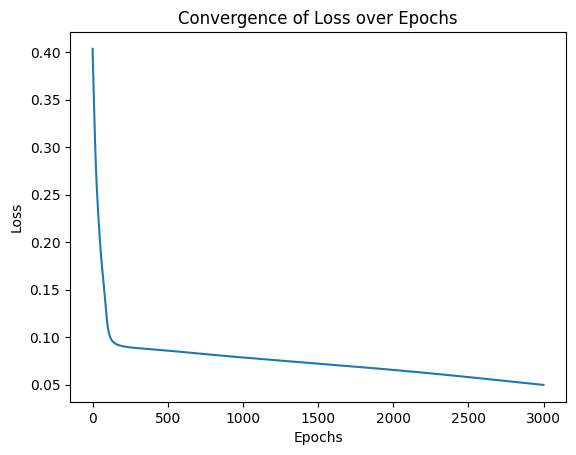


Predicted and Actual Outputs:
Digit 0: Predicted=0, Actual=0
Digit 1: Predicted=1, Actual=1
Digit 2: Predicted=2, Actual=2
Digit 3: Predicted=3, Actual=3
Digit 4: Predicted=4, Actual=4
Digit 5: Predicted=5, Actual=5
Digit 6: Predicted=6, Actual=6
Digit 7: Predicted=7, Actual=7
Digit 8: Predicted=0, Actual=8
Digit 9: Predicted=9, Actual=9


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Input patterns for digits 0-9 (7-segment encoding)
seven_segment_data = {
    0: [1, 1, 1, 1, 1, 1, 0],
    1: [0, 1, 1, 0, 0, 0, 0],
    2: [1, 1, 0, 1, 1, 0, 1],
    3: [1, 1, 1, 1, 0, 0, 1],
    4: [0, 1, 1, 0, 0, 1, 1],
    5: [1, 0, 1, 1, 0, 1, 1],
    6: [0, 0, 1, 1, 1, 1, 1],
    7: [1, 1, 1, 0, 0, 0, 0],
    8: [1, 1, 1, 1, 1, 1, 1],
    9: [1, 1, 1, 0, 0, 1, 1]
}

# Convert data to arrays
inputs = np.array(list(seven_segment_data.values()))
labels = np.eye(10)  # One-vs-all format for 10 classes

# Network architecture parameters
input_size = 7
hidden_layer1_size = 10  # Adjustable parameter
hidden_layer2_size = 10  # Adjustable parameter
output_size = 10  # 10 output neurons, one for each digit

# Initialize weights and biases
np.random.seed(42)
weights1 = np.random.randn(input_size, hidden_layer1_size)
bias1 = np.random.randn(hidden_layer1_size)
weights2 = np.random.randn(hidden_layer1_size, hidden_layer2_size)
bias2 = np.random.randn(hidden_layer2_size)
weights3 = np.random.randn(hidden_layer2_size, output_size)
bias3 = np.random.randn(output_size)

# Activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Feedforward function
def feedforward(inputs):
    global hidden_layer1_output, hidden_layer2_output, output

    hidden_layer1_output = sigmoid(np.dot(inputs, weights1) + bias1)
    hidden_layer2_output = sigmoid(np.dot(hidden_layer1_output, weights2) + bias2)
    output = sigmoid(np.dot(hidden_layer2_output, weights3) + bias3)
    return output

# Backpropagation function
def backpropagation(inputs, labels):
    global weights1, bias1, weights2, bias2, weights3, bias3

    # Forward pass
    feedforward(inputs)

    # Output layer error and delta
    output_error = labels - output
    output_delta = output_error * sigmoid_derivative(output)

    # Hidden layer 2 error and delta
    hidden_layer2_error = np.dot(output_delta, weights3.T)
    hidden_layer2_delta = hidden_layer2_error * sigmoid_derivative(hidden_layer2_output)

    # Hidden layer 1 error and delta
    hidden_layer1_error = np.dot(hidden_layer2_delta, weights2.T)
    hidden_layer1_delta = hidden_layer1_error * sigmoid_derivative(hidden_layer1_output)

    # Update weights and biases
    weights3 += learning_rate * np.dot(hidden_layer2_output.T, output_delta)
    bias3 += learning_rate * np.sum(output_delta, axis=0)
    weights2 += learning_rate * np.dot(hidden_layer1_output.T, hidden_layer2_delta)
    bias2 += learning_rate * np.sum(hidden_layer2_delta, axis=0)
    weights1 += learning_rate * np.dot(inputs.T, hidden_layer1_delta)
    bias1 += learning_rate * np.sum(hidden_layer1_delta, axis=0)

    return np.mean(output_error ** 2)

# Training parameters
epochs = 3000
learning_rate = 0.01
loss_history = []

# Training loop
for epoch in range(epochs):
    epoch_loss = backpropagation(inputs, labels)
    loss_history.append(epoch_loss)

    # Print progress every 100 epochs
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {epoch_loss}')

# Plot the loss history
plt.plot(loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Convergence of Loss over Epochs')
plt.show()

# Display predicted and actual values for each digit after training
print("\nPredicted and Actual Outputs:")
for i, digit_input in enumerate(inputs):
    predicted_output = feedforward(digit_input.reshape(1, -1))
    predicted_class = np.argmax(predicted_output)
    actual_class = np.argmax(labels[i])
    print(f"Digit {i}: Predicted={predicted_class}, Actual={actual_class}")
